#### Import Modules

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.text import Tokenizer
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Using TensorFlow backend.


#### Set seed for reproducibility

In [3]:
np.random.seed(400)

#### Generating data

In [4]:
features, target = make_regression(n_samples =10000,
                                  n_features = 3,
                                  n_informative =3,
                                  n_targets =1, 
                                  noise=0,
                                  random_state = 420)

#### Split Data into training and testing data

In [5]:
train_features, test_features, train_target, test_target =\
    train_test_split(features, target, test_size = 0.3, 
                    random_state = 0)

#### Create model

In [7]:
model = Sequential([
    Dense(units = 32, activation = 'relu', 
          input_shape = (train_features.shape[1], )),
    Dense(units = 32, activation ='relu'),
    Dense(units =1)
])

model.compile(loss = 'mse',
             optimizer = 'rmsprop',
             metrics = ['mse'])

#### Fit Model

In [8]:
history = model.fit(train_features, train_target, epochs =3, 
         verbose =1, batch_size= 100, 
         validation_data = (test_features, test_target))

Train on 7000 samples, validate on 3000 samples
Epoch 1/3
7000/7000 [==============================] - 0s 46us/step - loss: 9893.0519 - mse: 9893.0518 - val_loss: 9624.6773 - val_mse: 9624.6768
Epoch 2/3
7000/7000 [==============================] - 0s 14us/step - loss: 9175.1221 - mse: 9175.1221 - val_loss: 8639.2727 - val_mse: 8639.2725
Epoch 3/3
7000/7000 [==============================] - 0s 15us/step - loss: 7899.4703 - mse: 7899.4702 - val_loss: 7062.5148 - val_mse: 7062.5161


#### Visualize Learning Curve

In [17]:
history.history

{'val_loss': [9624.677294921876, 8639.272672526042, 7062.51484375],
 'val_mse': [9624.6767578125, 8639.2724609375, 7062.51611328125],
 'loss': [9893.051918247767, 9175.122105189732, 7899.470347377232],
 'mse': [9893.052, 9175.122, 7899.47]}

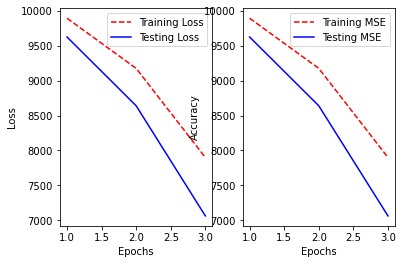

In [16]:
import matplotlib.pyplot as plt

# get loss and accuracy histories for training and test sets
training_loss = history.history['loss']
test_loss = history.history['val_loss']
training_mse = history.history['mse']
test_mse = history.history['val_mse']

# create epochs count
epoch_count = range(1, len(training_loss) +1)

plt.figure()

# visualize loss history
plt.subplot(1,2,1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Testing Loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')

# visualize accuracy
plt.subplot(1,2,2)
plt.plot(epoch_count, training_mse, 'r--')
plt.plot(epoch_count, test_mse, 'b-')
plt.legend(['Training MSE', 'Testing MSE'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()